# **Курсовой проект: Предоставление рекомендаций для HR на основе данных**

**Этапы PACE**

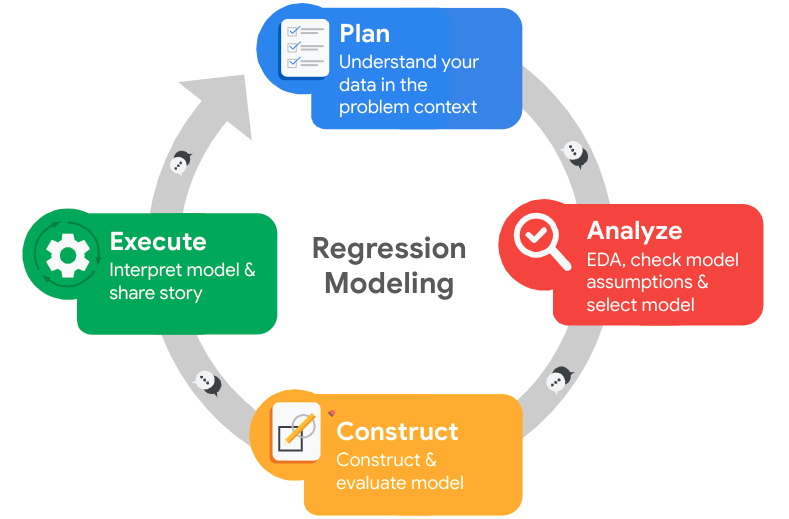

## Pace: Планирование

**Понимание бизнес-сценария и проблемы**

Отдел кадров компании Salifort Motors стремится предпринять инициативы для повышения уровня удовлетворенности сотрудников. Они собрали обширные данные о своих сотрудниках, но не уверены, как их эффективно использовать. Они обращаются к нам за рекомендациями на основе анализа этих данных, с вопросом: что может заставить сотрудника покинуть компанию?

Наши цели в этом проекте — проанализировать данные, собранные отделом кадров, и построить модель, способную прогнозировать, покинет ли сотрудник компанию.

Если мы сможем предсказать вероятность ухода сотрудников, мы сможем выявить ключевые факторы, влияющие на их решение. Это позволит предпринять меры для повышения удовлетворенности и удержания персонала. Поскольку процесс поиска, проведения собеседований и найма новых сотрудников требует значительных временных и финансовых затрат, улучшение показателей удержания будет значительно выгодно для компании.

**Ознакомление с набором данных HR**

В этом [наборе данных](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv) имеется 14 999 строк, 10 столбцов и следующие переменные:

Переменная |Описание |
-----|-----|
satisfaction_level|Уровень удовлетворенности работой, по оценкам сотрудников [0–1]|
last_evaluation|Оценка последней оценки производительности сотрудника [0–1]|
number_project|Количество проектов, в которых внес вклад сотрудник|
average_monthly_hours|Среднее количество часов, отработанных сотрудником в месяц|
time_spend_company|Как долго сотрудник работает в компании (лет)
Work_accident|Независимо от того, произошел ли с сотрудником несчастный случай на работе
left|Ушел ли сотрудник из компании или нет
promotion_last_5years|Независимо от того, был ли сотрудник повышен в должности за последние 5 лет.
Department|Отдел сотрудников
salary|Заработная плата сотрудника (доллары США)

### Импорт

* Импорт пакетов
* Загрузка набора данных

#### Импорт пакетов

In [1]:
# Установим библиотеки
!pip install xgboost -q

In [2]:
# Импорт пакетов

# Для манипулирования данными
import numpy as np
import pandas as pd

# Для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Для отображения всех столбцов в датафреймах
pd.set_option('display.max_columns', None)

# Для моделирования данных
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Для метрик и полезных функций
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# Для сохранения моделей
import pickle

#### Загрузка набора данных

In [3]:
# Загрузка данных
df0 = pd.read_csv('HR_comma_sep.csv')

# Отобразим первые несколько строк
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

### Исследование данных (Начальный анализ данных и очистка данных)

- Понимание переменных
- Очистка набора данных (пропущенные данные, избыточные данные, выбросы)

#### Соберём основную информацию о данных

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Соберём описательную статистику о данных

In [5]:
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

#### Переименуем столбцы

Стандартизируем имена столбцов, чтобы все они были в `snake_case`, исправим все имена столбцов с ошибками и при необходимости сделаем имена столбцов более краткими.

In [6]:
# Отобразим имена всех столбцов
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Преобразуем имена столбцов в snake_case и исправим ошибки
df0.columns = df0.columns.str.lower().str.replace(' ', '_')

In [8]:
# Исправим конкретные ошибки и сделаем имена более краткими
df0.rename(columns={
    'average_montly_hours': 'average_monthly_hours',
    'time_spend_company': 'tenure',  # Сократим для краткости
    'work_accident': 'work_accident',  # Приведем к нижнему регистру
    'department': 'department',  # Приведем к нижнему регистру
}, inplace=True)

# Отобразим измененные имена столбцов
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

#### Проверим пропущенные значения

Проверим наличие пропущенных значений.

In [9]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

В данных нет пропущенных значений.

#### Проверим наличие дубликатов

Проверим наличие повторяющихся записей в данных.

In [10]:
# Проверка дубликатов
num_duplicates = df0.duplicated().sum()

# Общее количество записей
total_records = len(df0)

# Процент дубликатов
percentage_duplicates = (num_duplicates / total_records) * 100

print(f"Количество дубликатов: {num_duplicates}")
print(f"Процент дубликатов: {percentage_duplicates:.2f}%")

Количество дубликатов: 3008
Процент дубликатов: 20.05%


In [11]:
# Проверим некоторые строки, содержащие дубликаты
df0[df0.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

Мало правдоподобно, что два сотрудника одинаково ответили на каждый вопрос, поэтому удалим повторные записи.

In [12]:
# Удалим дубликаты и сохраним полученный фрейм данных в новой переменной
df1 = df0.drop_duplicates(keep='first')

# Отобразим первые несколько строк нового датафрейма
df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

#### Проверим наличие выбросов

Проверим наличие выбросов в данных.

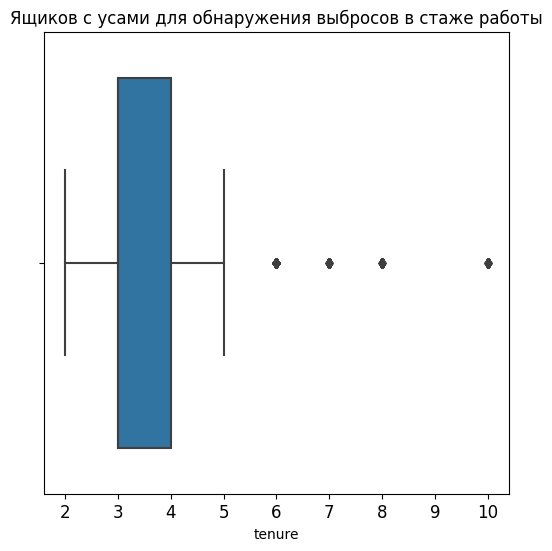

In [13]:
# Создадим ящики с усами для визуализации распределения `tenure` и обнаружения выбросов
plt.figure(figsize=(6,6))
plt.title('Ящиков с усами для обнаружения выбросов в стаже работы', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

На диаграмме выше показано, что в переменной `tenure` есть выбросы.

Выясним, сколько строк данных содержат выбросы в столбце `tenure`.

In [14]:
# Определем количество строк, содержащих выбросы

# Вычислим значение 25-го процентиля в `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Вычислим значение 75-го процентиля в `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Вычислим межквартильный размах в `tenure`
iqr = percentile75 - percentile25

# Определим верхний и нижний пределы для значений без выбросов в `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Нижний предел:", lower_limit)
print("Верхний предел:", upper_limit)

# Идентифицируем подмножество данных, содержащих выбросы в `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Подсчитаем количество строк в данных, содержащих выбросы в `tenure`
print("Количество строк в данных, содержащих выбросы в `tenure`:", len(outliers))

Нижний предел: 1.5
Верхний предел: 5.5
Количество строк в данных, содержащих выбросы в `tenure`: 824


## pAce: Этап анализа
- Выполнение EDA (анализ взаимосвязей между переменными)

### Исследование данных (продолжение EDA)

Cколько сотрудников ушло и какой процент от всех сотрудников представляет эта цифра?

In [15]:
# Получим количество людей, которые ушли и которые остались
left_counts = df1['left'].value_counts()
left_percentage = df1['left'].value_counts(normalize=True) * 100

print("Количество людей, которые ушли и которые остались:")
print(left_counts)
print()

print("Процент людей, которые ушли и которые остались:")
print(left_percentage.round(2))

Количество людей, которые ушли и которые остались:
0    10000
1     1991
Name: left, dtype: int64

Процент людей, которые ушли и которые остались:
0    83.4
1    16.6
Name: left, dtype: float64


#### Визуализация данных

Создадим графики для визуализации взаимосвязей между переменными в наших данных. Для начала мы создадим составную диаграмму, которая покажет распределение среднемесячного количества часов в зависимости от числа проектов, сравнивая сотрудников, которые остались в компании, и тех, кто ушел.

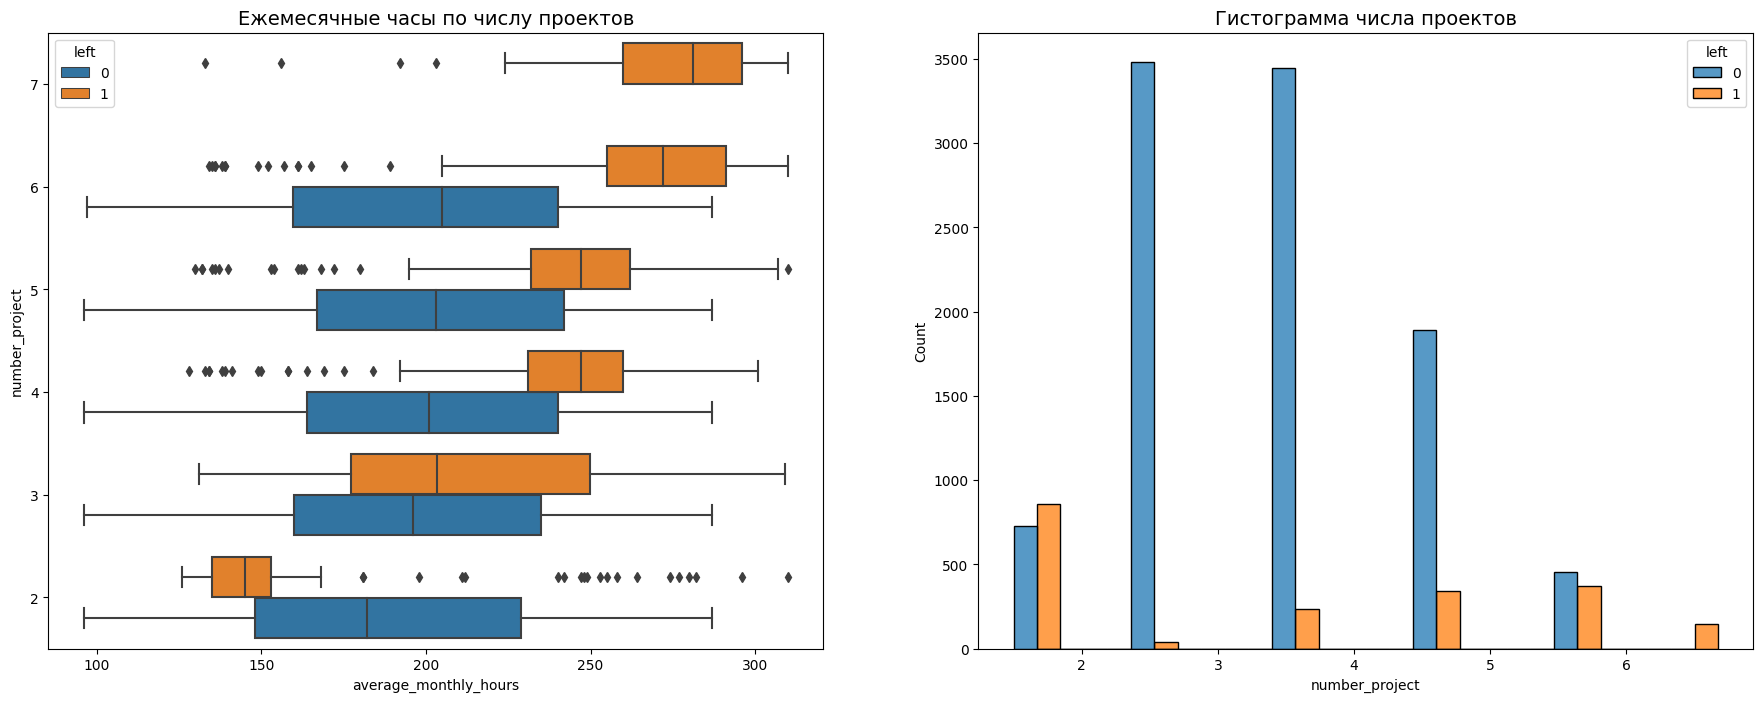

In [16]:
# Создание графика по необходимости

# Установка фигуры и осей
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Создание ящиков с усами, показывающих распределения `average_monthly_hours` для `number_project`, сравнивая сотрудников, которые остались, с теми, кто ушел
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Ежемесячные часы по числу проектов', fontsize='14')

# Создание гистограммы, показывающей распределение `number_project`, сравнивая сотрудников, которые остались, с теми, кто ушел
tenure_stay = df1[df1['left'] == 0]['number_project']
tenure_left = df1[df1['left'] == 1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Гистограмма числа проектов', fontsize='14')

# Отображение графиков
plt.show()

Понятно, что сотрудники, работающие над большим числом проектов, обычно также проводят на работе больше времени. Из наших данных видно, что среднее количество рабочих часов увеличивается с увеличением числа проектов. Однако, из этой связи можно выделить несколько интересных моментов:

1. Среди уволившихся сотрудников есть две выделяющиеся группы: (А) те, кто работал значительно меньше, чем коллеги с таким же количеством проектов, и (Б) те, кто работал гораздо больше. Скорее всего, из группы (А) уволились или они уже планировали уволиться, поэтому им было назначено меньше часов. А сотрудники из группы (Б) скорее всего планируют уволиться, учитывая их большой вклад в проекты.

2. Все сотрудники, работавшие над семью проектами, покинули компанию, и их количество часов работы было значительно выше, чем у тех, кто работал над шестью проектами.

3. Оптимальное количество проектов для сотрудников — 3-4. В этих когортах процент увольнений намного меньше.

4. Если предположить, что рабочая неделя составляет 40 часов, а сотрудники имеют две недели отпуска в году, то среднее количество рабочих часов в месяц должно составлять около 166,67. Видно, что сотрудники, работавшие над меньшим числом проектов, уже перегружены работой.

Дальнейшим шагом может быть подтверждение того, что все сотрудники, работавшие над семью проектами, покинули компанию.

In [17]:
# Получим подсчет количество оставшихся/ушедших сотрудников с 7 проектами
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

Это подтверждает, что все сотрудники с 7 проектами ушли.

Сравним среднее количество часов в месяц с уровнем удовлетворенности.

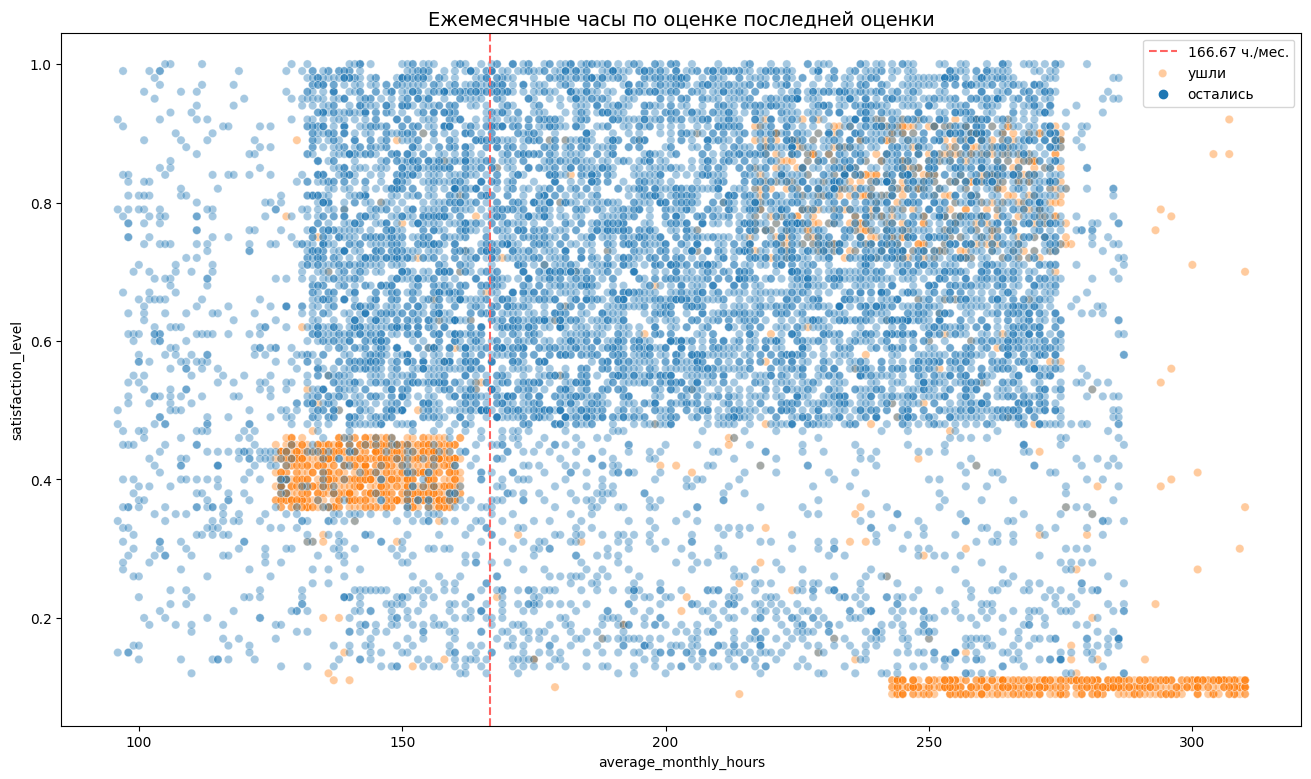

In [18]:
# Создадим точечную диаграмму `average_monthly_hours` по отношению к `satisfaction_level`, 
# сравнивая сотрудников, которые остались, с теми, кто ушел
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 ч./мес.', ls='--')
plt.legend(labels=['166.67 ч./мес.', 'ушли', 'остались'])
plt.title('Ежемесячные часы по оценке последней оценки', fontsize='14');

График рассеяния показывает, что существует значительная группа сотрудников, которые работали от ~240 до 315 часов в месяц. Это более 75 часов в неделю на протяжении всего года. Возможно, именно из-за этой перегрузки уровень их удовлетворенности стремится к нулю.

Также на графике видна другая группа уволившихся сотрудников, у которых был более стандартный график работы. Несмотря на это, их уровень удовлетворенности составлял всего около 0,4. Понять причину их ухода сложно. Возможно, они ощущали давление работать больше, видя, что их коллеги проводили на работе больше времени, и это могло отразиться на их уровне удовлетворенности.

На графике присутствует группа сотрудников, работавших примерно от ~210 до 280 часов в месяц, и уровень их удовлетворенности варьируется в диапазоне от ~0,7 до 0,9.

Обратим внимание на необычную форму распределения данных. Это может быть следствием манипуляций с данными или использования синтетических данных.

Визуализируем уровни удовлетворенности по стажу работы.

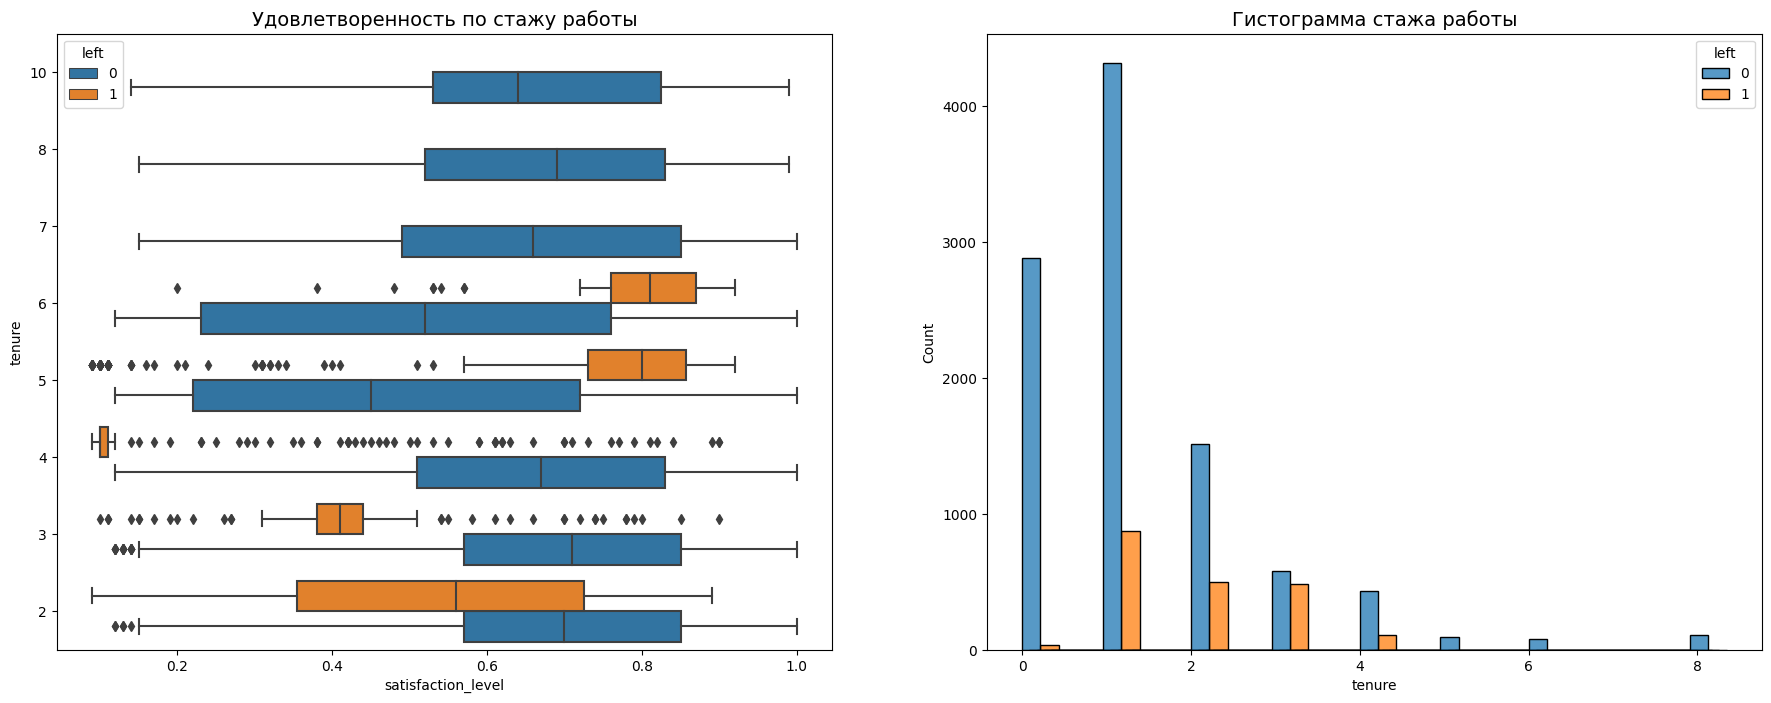

In [19]:
# Установка фигуры и осей
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Создание ящиков с усами, показывающих распределения `satisfaction_level` по стажу работы, сравнивая сотрудников, которые остались, с теми, кто ушел
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Удовлетворенность по стажу работы', fontsize='14')

# Создание гистограммы, показывающей распределение `tenure`, сравнивая сотрудников, которые остались, с теми, кто ушел
tenure_stay = df1[df1['left'] == 0]['tenure']
tenure_left = df1[df1['left'] == 1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Гистограмма стажа работы', fontsize='14')

plt.show();

Из представленных графиков можно сделать несколько интересных наблюдений:

- Среди ушедших сотрудников можно выделить две основные категории: во-первых, это неудовлетворенные сотрудники с относительно коротким сроком работы в компании, а во-вторых, это очень довольные сотрудники, у которых средний срок работы в компании.

- Сотрудники с четырехлетним стажем, покинувшие компанию, выделяются своим необычно низким уровнем удовлетворенности. Возможно, имеет смысл изучить изменения в корпоративной политике, которые могли повлиять на этих сотрудников именно после четырех лет работы.

- Наиболее долго работающие сотрудники остались в компании. Их уровень удовлетворенности соответствует уровню удовлетворенности новых сотрудников, которые остались в компании.

- Гистограмма показывает, что сотрудников с более длительным стажем относительно мало. Это может указывать на то, что среди них могут быть высокопоставленные и высокооплачиваемые сотрудники.

Рассчитаем средние и медианные значения уровня удовлетворенности среди уволившихся и оставшихся сотрудников.

In [20]:
# Рассчитаем средний и медианный баллы удовлетворенности сотрудников, 
# которые ушли, и тех, кто остался.
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

Ожидаемо, средние и медианные значения уровня удовлетворенности среди ушедших сотрудников ниже, чем у тех, кто остался. Это может указывать на некоторое смещение влево в распределении уровня удовлетворенности среди этой группы.

Изучим уровни заработной платы в зависимости от стажа работы в компании.

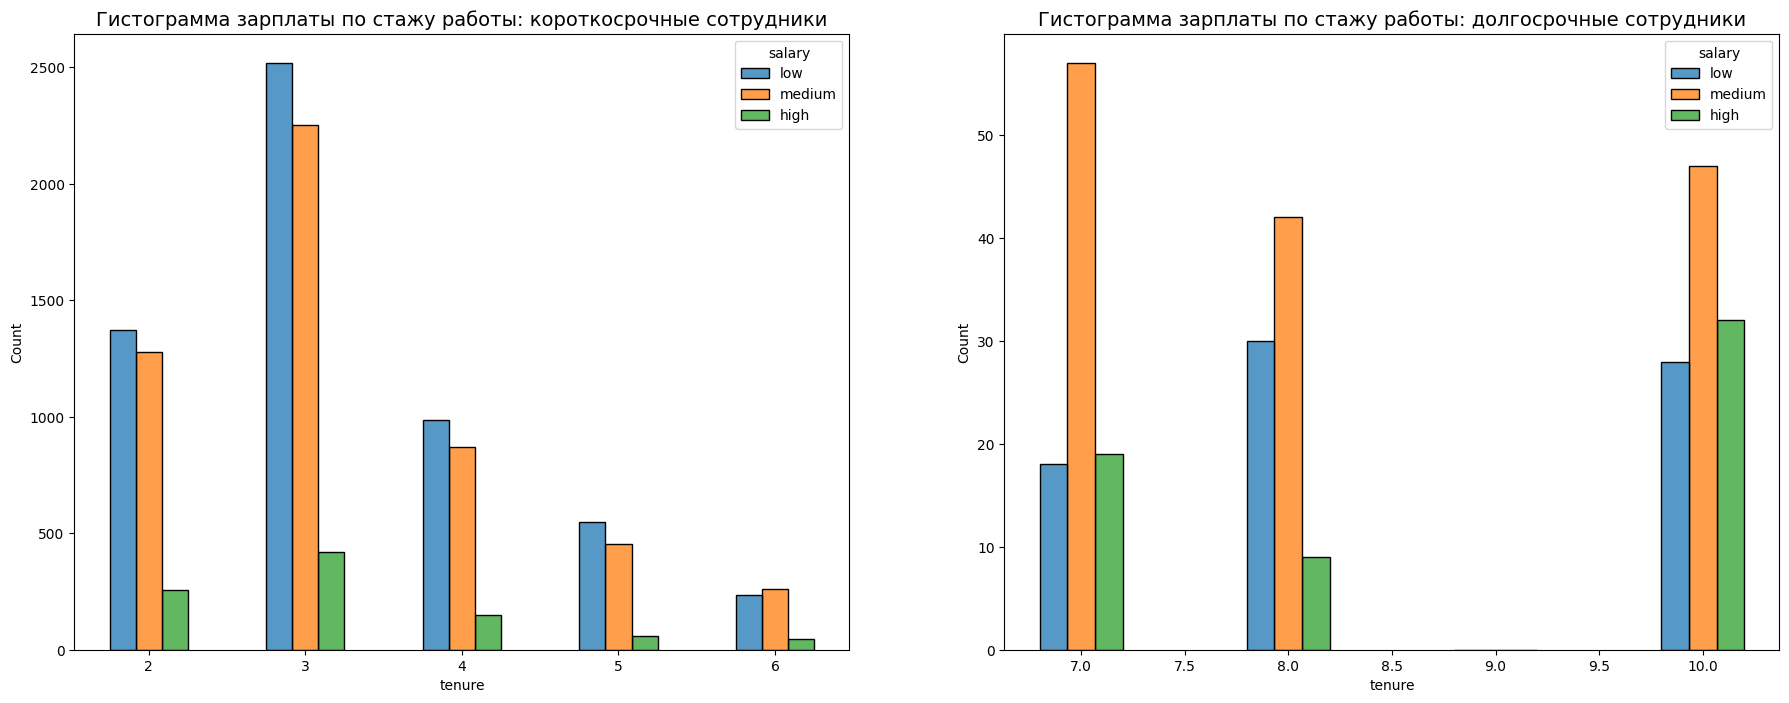

In [21]:
# Установка фигуры и осей
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Определение сотрудников с коротким сроком работы
tenure_short = df1[df1['tenure'] < 7]

# Определение сотрудников с длительным сроком работы
tenure_long = df1[df1['tenure'] > 6]

# Построение гистограммы для сотрудников с коротким сроком работы
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Гистограмма зарплаты по стажу работы: короткосрочные сотрудники', fontsize='14')

# Построение гистограммы для сотрудников с длительным сроком работы
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Гистограмма зарплаты по стажу работы: долгосрочные сотрудники', fontsize='14');

Приведенные выше графики показывают, что среди сотрудников с длительным стажем работы нет непропорционально большой доли высокооплачиваемых сотрудников.

Теперь давайте выясним, существует ли корреляция между сверхурочной работой и получением высоких оценок. Для этого можно создать диаграмму рассеяния, отображающую взаимосвязь между `average_monthly_hours` и `last_evaluation`.

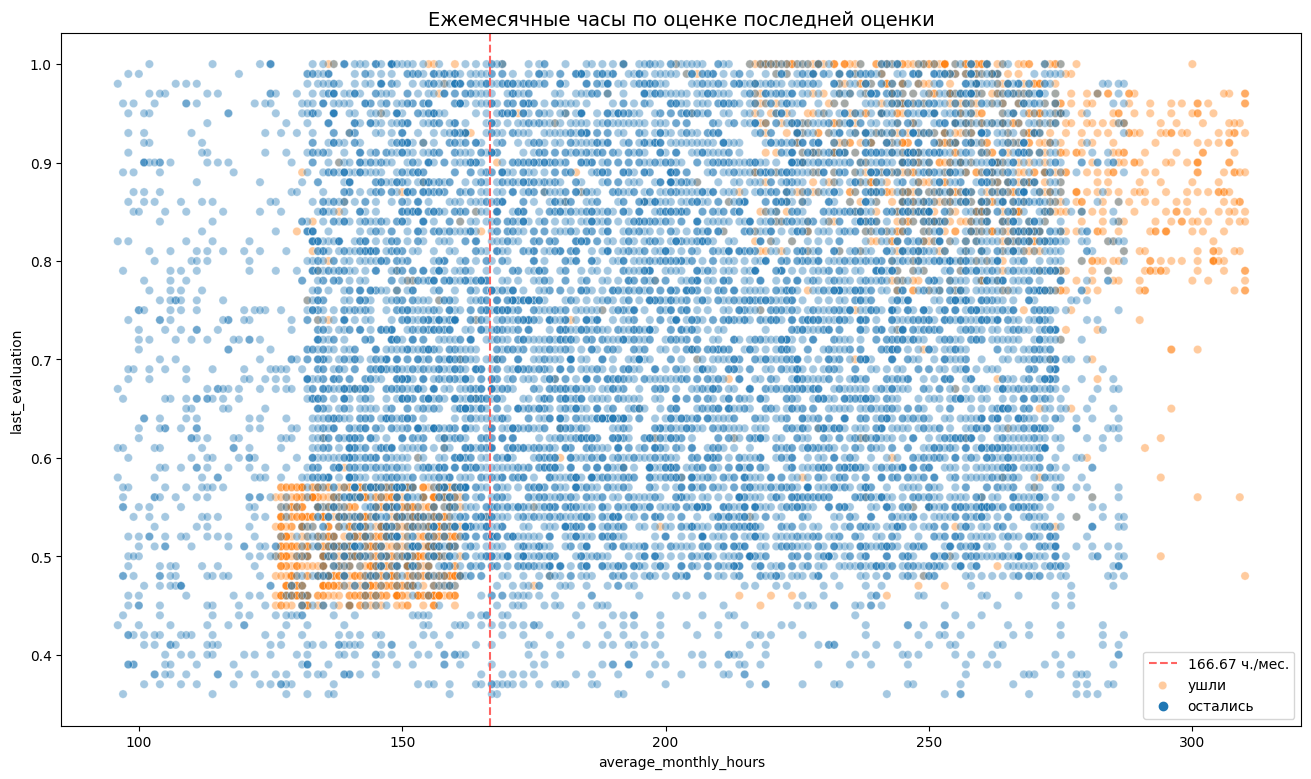

In [22]:
# Создание точечной диаграммы `average_monthly_hours` по отношению к `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 ч./мес.', ls='--')
plt.legend(labels=['166.67 ч./мес.', 'ушли', 'остались'])
plt.title('Ежемесячные часы по оценке последней оценки', fontsize='14');

Из приведенной выше диаграммы рассеяния можно сделать следующие наблюдения:

- Диаграмма рассеяния указывает на две группы уволившихся сотрудников: перегруженных работой сотрудников с высокими оценками и сотрудников, которые работали немного ниже номинального среднемесячного показателя в 166,67 часов с более низкими оценками.
- Кажется, существует корреляция между отработанным временем и оценкой.
- В верхнем левом квадранте графика невелик процент сотрудников, что показывает, что работа сверхурочно не гарантирует хорошую оценку.
- Большинство сотрудников этой компании работают более 167 часов в месяц.

Проверим, получали ли сотрудники, которые работали очень много часов, повышение по службе за последние пять лет.

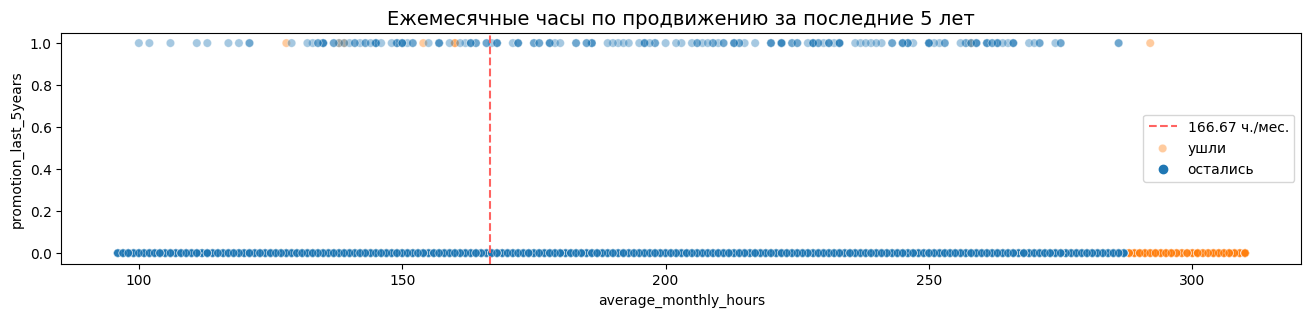

In [23]:
# Создание графика для изучения взаимосвязи между `average_monthly_hours` и `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 ч./мес.', 'ушли', 'остались'])
plt.title('Ежемесячные часы по продвижению за последние 5 лет', fontsize='14');

График выше показывает следующее:

- Уволилось очень мало сотрудников, получивших повышение за последние пять лет.
- Лишь немногие сотрудники, работающие наибольшее количество часов, были повышены в должности.
- Все ушедшие сотрудники работали больше всех.

Теперь посмотрим, как ушедшие сотрудники распределяются по отделам.

In [24]:
df1['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

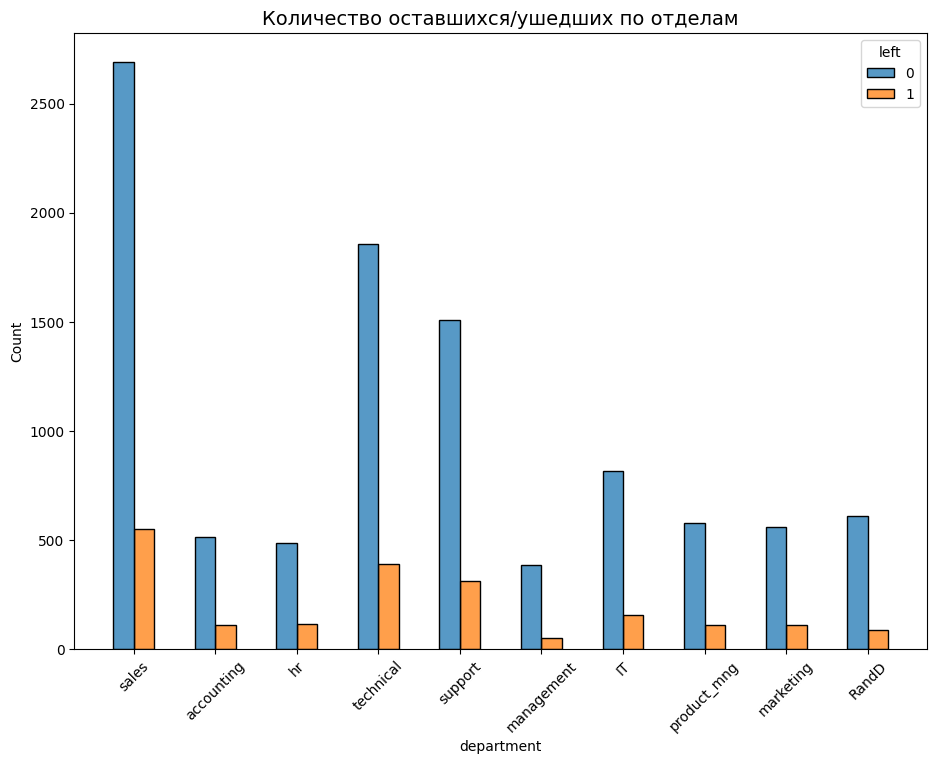

In [25]:
# Создание стопкистограммы для сравнения распределения отделов у сотрудников, которые ушли, с теми, кто остался
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Количество оставшихся/ушедших по отделам', fontsize=14);

Кажется, ни один из отделов не выделяется существенно по соотношению ушедших сотрудников к оставшимся.

Теперь проверим наличие сильной корреляции между переменными в данных.

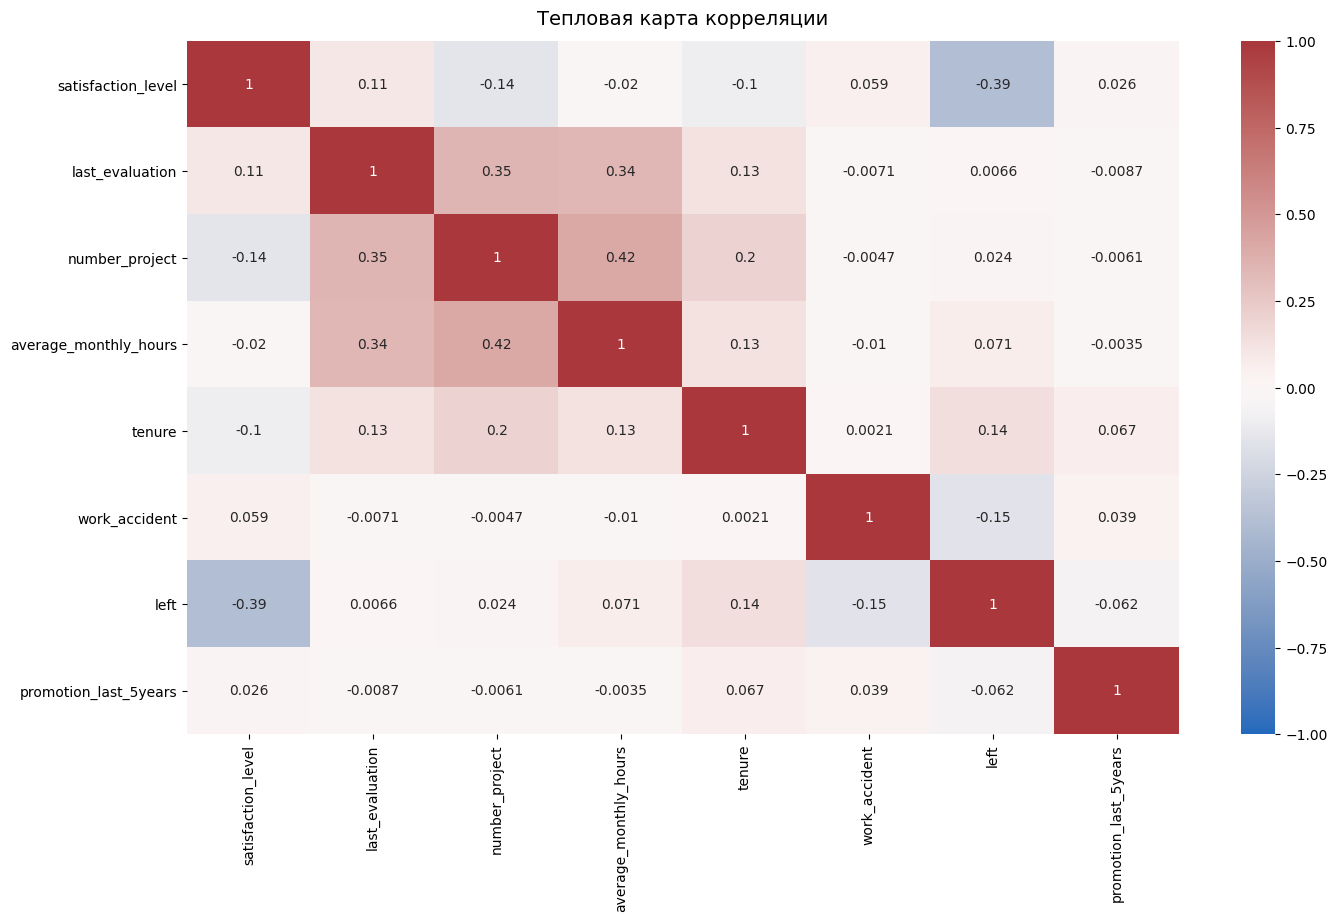

In [26]:
# Построим тепловую карту корреляции
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette('vlag', as_cmap=True))
heatmap.set_title('Тепловая карта корреляции', fontdict={'fontsize':14}, pad=12);

Тепловая карта корреляции показывает, что количество проектов, среднее количество ежемесячных часов и последние оценки имеют некоторую положительную корреляцию друг с другом. В то же время, уход сотрудника отрицательно коррелирует с уровнем его удовлетворенности.

#### Аналитика

Похоже, что причина ухода сотрудников связана с плохим управлением. Этот вывод подкрепляется тем, что уход связан с длительным рабочим временем, большим числом проектов и, как следствие, обычно с низким уровнем удовлетворенности. Возможно, сотрудникам неприятно работать сверхурочно, не получая признания в виде повышения по службе или высоких оценок. В компании также выделяется значительная группа сотрудников, которые, вероятно, испытали выгорание. Также стоит отметить, что если сотрудник проработал в компании более шести лет, вероятность его ухода снижается.

## paCe: Этап построения
- Определение наиболее подходящих моделей
- Построение модели
- Подтверждение предположений модели
- Оценка результатов модели для определения того, насколько хорошо модель соответствует данным

### Определение типа задачи прогнозирования.

Наша цель состоит в том, чтобы определить, покинет ли сотрудник компанию, что является категориальной зависимой переменной. Поэтому перед нами стоит задача классификации. Более точно, это можно определить как бинарную классификацию, так как зависимая переменная `left` может принимать только два значения: 1 (сотрудник ушел) или 0 (сотрудник остался).

### Определение типов моделей, наиболее подходящих для этой задачи.

Поскольку целевая переменная, которую мы хотим предсказать (уходит ли сотрудник из компании), является категориальной, мы можем построить модель логистической регрессии и модель машинного обучения на основе деревьев.

### Модель логистической регрессии

#### Логистическая регрессия
Биномиальная логистическая регрессия подходит для этой задачи, потому что она включает бинарную классификацию.
Перед разделением данных закодируем нечисловые переменные. Их две: `department` и `salary`.

Переменная `department` является категориальной, что позволяет нам использовать метод dummy-кодирования для моделирования.

Переменная `salary` также является категориальной, но у нее есть упорядоченные значения. Поскольку в этой переменной есть иерархия категорий, предпочтительно не использовать dummy-кодирование, а преобразовать уровни к числам от 0 до 2.

In [27]:
# Копирование фрейма данных
df_enc = df1.copy()

# Кодирование столбца `salary` как ординарной числовой категории
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Применение dummy-кодирования к столбцу `department`
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Отображение нового фрейма данных
df_enc.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0              0   
1       6              0     1                      0       1              0   
2       4              0     1                      0       1              0   
3       5              0     1                      0       0              0   
4       3              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

Создадим тепловую карту для визуализации коррелирующих переменных.

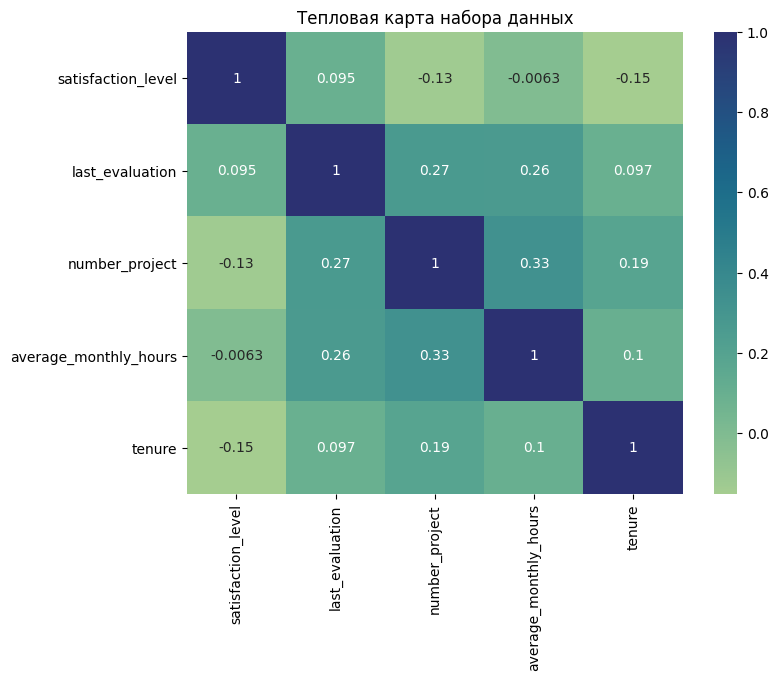

In [28]:
# Создание тепловой карты для визуализации коррелированных переменных
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap='crest')
plt.title('Тепловая карта набора данных')
plt.show()

Построим столбчатую диаграмму с накоплением для визуализации количества сотрудников по отделам, сравнивая тех, кто ушел, с теми, кто остался.

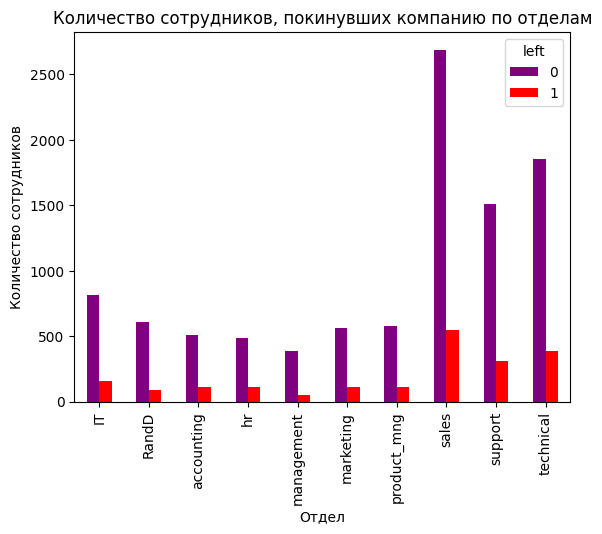

In [29]:
# Создание столбчатой диаграммы с накоплением для визуализации количества сотрудников по отделам, сравнивая тех, кто ушел, с теми, кто остался
# В легенде, 0 (фиолетовый цвет) представляет сотрудников, которые не ушли, 
# 1 (красный цвет) представляет сотрудников, которые ушли
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar', color=['purple', 'red'])
plt.title('Количество сотрудников, покинувших компанию по отделам')
plt.ylabel('Количество сотрудников')
plt.xlabel('Отдел')
plt.show()

Поскольку логистическая регрессия достаточно чувствительна к выбросам, удалим выбросы в столбце `tenure`, которые были ранее идентифицированы.

In [30]:
# Выбор строк без выбросов в столбце `tenure` и сохранение результирующего фрейма данных в новой переменной
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Отображение первых нескольких строк нового фрейма данных
df_logreg.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0              0   
2       4              0     1                      0       1              0   
3       5              0     1                      0       0              0   
4       3              0     1                      0       0              0   
5       3              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

Выделим зависимую переменную, которую будет предсказывать наша модель.

In [31]:
# Выделим зависимую переменную
y = df_logreg['left']

# Отобразим первые несколько строк зависимой переменной
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

Выберем признаки, которые мы хотите использовать в своей модели.

In [32]:
# Выберем признаки
X = df_logreg.drop('left', axis=1)

# Отобразите первые несколько строк выбранных признаков
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0              0   
2       4              0                      0       1              0   
3       5              0                      0       0              0   
4       3              0                      0       0              0   
5       3              0                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

Разделим данные на обучающий набор и тестовый набор. Стратифицировать на основе значений в `y`, поскольку классы несбалансированы.

In [33]:
# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Построим модель логистической регрессии и обучим её на обучающем наборе данных.

In [34]:
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

Проверим модель логистической регрессии на тестовом наборе.

In [35]:
y_pred = log_clf.predict(X_test)

Создадим матрицу ошибок для визуализации результатов модели логистической регрессии.

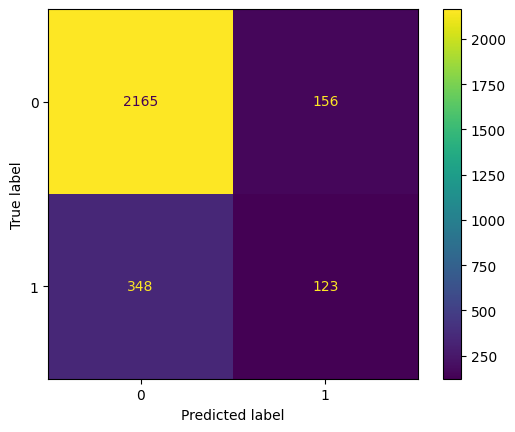

In [36]:
# Вычислим значения матрицы ошибок
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Создадим отображение матрицы ошибок
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Построим матрицу ошибок
log_disp.plot(values_format='')

# Отобразим график
plt.show()

В верхнем левом углу экрана отображается количество истинно отрицательных результатов: 2165. Это представляет собой число людей, которые остались, и которых модель правильно идентифицировала как не ушедших.

На верхнем правом углу экрана вы увидите количество ложно положительных результатов: 156. Это число отражает количество людей, которые остались, но которых модель неверно классифицировала как ушедших.

В нижнем левом углу экрана показывается количество ложно отрицательных результатов: 348. Это число представляет собой количество людей, которые ушли, но которых модель ошибочно определила как не ушедших.

И, наконец, в нижнем правом углу экрана отображается количество истинно положительных результатов: 123. Это число отражает количество людей, которые ушли, и которых модель правильно идентифицировала как ушедших.

Идеальная модель дала бы только истинно отрицательные и истинно положительные результаты, без каких-либо ложных отрицательных или ложных положительных результатов.

Для полного анализа производительности модели логистической регрессии создадим отчет о классификации, включающий метрики точности, полноты, F1-меры и точности.

Проверим баланс классов в данных.

In [37]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

Разделение данных составляет примерно 83% на 17%. Хотя данные не являются идеально сбалансированными, они также не являются чрезмерно несбалансированными. В данном случае данные можно использовать без корректировки баланса классов, продолжая оценивать модель.

In [38]:
# Создание отчета о классификации для модели логистической регрессии
target_names = ['Предполагаемый уход', 'Предполагаемое оставание']
print(classification_report(y_test, y_pred, target_names=target_names))

                          precision    recall  f1-score   support

     Предполагаемый уход       0.86      0.93      0.90      2321
Предполагаемое оставание       0.44      0.26      0.33       471

                accuracy                           0.82      2792
               macro avg       0.65      0.60      0.61      2792
            weighted avg       0.79      0.82      0.80      2792



Отчет о классификации показывает, что модель логистической регрессии достигла точности 79%, полноты 82%, F1-меры 80% (взвешенные средние) и точности 82%. Однако, если наибольшее значение имеет предсказание уходящих сотрудников, показатели существенно ниже.

### Модель на основе деревьев

Выделим зависимую переменную.

In [39]:
y = df_enc['left']

Отобразим первые несколько строк `y`

In [40]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

Выберем признаки.

In [41]:
X = df_enc.drop('left', axis=1)

Отобразим первые несколько строк `X`

In [42]:
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0              0   
1       6              0                      0       1              0   
2       4              0                      0       1              0   
3       5              0                      0       0              0   
4       3              0                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

Разделим данные на обучающий, проверочный и тестовый наборы.

In [43]:
# Разделим данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Дерево решений - Раунд 1

Построим модель дерева решений и настроим кросс-валидацию с исчерпывающим перебором параметров модели.

In [44]:
# Создание экземпляра модели
tree = DecisionTreeClassifier(random_state=0)

# Задаём словарь гиперпараметров для поиска
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Задаём словарь метрик для оценки
scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'roc_auc': 'roc_auc'}

# Создание экземпляра GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Обучим модель дерева решений на обучающих данных

In [45]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 3.33 s, sys: 80.6 ms, total: 3.42 s
Wall time: 3.42 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

Определим оптимальные значения параметров дерева решений.

In [46]:
# Проверим лучшие параметры
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

Определим лучший показатель AUC, достигнутый с помощью модели дерева решений на обучающем наборе.

In [47]:
# Проверим лучший результат AUC
tree1.best_score_

0.969819392792457

Это впечатляющий показатель AUC, демонстрирующий, что данная модель обладает высокой способностью прогнозировать увольнение сотрудников.

Далее создадим функцию, которая поможет извлечь все баллы из поиска по сетке.

In [48]:
def make_results(model_name: str, model_object, metric: str):
    '''
    Аргументы:
        model_name (string): как вы хотите назвать модель в выходной таблице
        model_object: объект GridSearchCV, к которому применена подгонка
        metric (string): precision, recall, f1, accuracy или auc

    Возвращает pandas DataFrame с F1, recall, precision, accuracy и auc
    оценками для модели с лучшим средним значением 'metric' по всем валидационным наборам.  
    '''

    # Создайте словарь, который отображает входную метрику на фактическое имя метрики в GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Получить все результаты CV и поместить их в DataFrame
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Выделить строку DataFrame с максимальным значением метрики
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Извлечь accuracy, precision, recall и f1 score из этой строки
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Создать таблицу результатов
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

Используем только что определенную функцию для получения всех оценок от поиска по сетке.

In [49]:
# Получим все оценки CV
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819

Все эти оценки для модели дерева решений являются сильными индикаторами ее хорошей производительности.

Но деревья решений могут быть подвержены переобучению. Случайные леса помогают избежать этого, используя несколько деревьев для предсказаний. Следующим шагом  создадим модель случайного леса.

#### Случайный лес - Раунд 1

Построим модель случайного леса и настроим кросс-валидированный поиск по сетке для исчерпывающего поиска наилучших параметров модели.

In [50]:
# Создадим модель
rf = RandomForestClassifier(random_state=0)

# Зададим словарь гиперпараметров для поиска
cv_params = {'max_depth': [3, 5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [300, 500],
             }

# Зададим словарь оценочных метрик для захвата
scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'roc_auc': 'roc_auc'}

# Создадим GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Обучим модель случайного леса на обучающих данных.

In [51]:
%%time
rf1.fit(X_train, y_train) # --> Время выполнения: ~10 минут

CPU times: user 18min, sys: 7.59 s, total: 18min 8s
Wall time: 18min 14s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

Укажем путь к месту, где мы хотим сохранить свою модель

In [52]:
path = './model/'

Определим функции для сериализации модели и чтения модели

In [53]:
def write_pickle(path, model_object, save_as: str):
    '''
    Входные данные:
        path: путь к папке, где вы хотите сохранить файл сериализации
        model_object: объект модели, который вы хотите сериализовать
        save_as: имя файла, под которым вы хотите сохранить модель

    Выход: вызов сериализации модели в указанной папке
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [54]:
def read_pickle(path, saved_model_name: str):
    '''
    Входные данные:
        path: путь к папке, из которой вы хотите прочитать файл
        saved_model_name: имя файла сериализованной модели, которую вы хотите прочитать

    Выход: 
        model: сериализованная модель
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

Используем ранее определенные функции, чтобы сохранить модель в файле pickle и затем прочитать её.

In [55]:
# Запись pickle
write_pickle(path, rf1, 'hr_rf1')

In [56]:
# Чтение pickle
rf1 = read_pickle(path, 'hr_rf1')

Определим лучший AUC-результат, достигнутый моделью случайного леса на тренировочном наборе данных.

In [57]:
# Проверим лучший AUC-результат на CV
rf1.best_score_

0.9804250949807172

Определим оптимальные значения параметров для модели случайного леса.

In [58]:
# Проверим лучшие параметры
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

Соберём оценки модели на тренировочном наборе данных для моделей решающего дерева и случайного леса.

In [59]:
# Получение всех оценок на кросс-валидации
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


Показатели оценки модели случайного леса превосходят показатели модели решающего дерева во многих аспектах, за исключением recall (оценка recall модели случайного леса незначительно ниже, на примерно 0.001). Это свидетельствует о том, что в большинстве случаев модель случайного леса превосходит модель решающего дерева.

Теперь давайте проведем оценку финальной модели на тестовом наборе данных.

Определим функцию, которая получает все оценки от прогнозов модели.

In [60]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Генерация таблицы тестовых оценок.
    Входные данные: 
        model_name (string): название модели в выходной таблице
        model: объект GridSearchCV
        X_test_data: массив numpy с данными X_test
        y_test_data: массив numpy с данными y_test

    Выход: pandas df с оценками точности, полноты, F1, точности и AUC для модели
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })

    return table

Используем наилучшую модель для прогнозирования на тестовом наборе данных.

In [61]:
# Получим прогнозы для тестовых данных
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.964211  0.919679  0.941418  0.980987  0.956439

Оценки на тестовом наборе данных очень схожи с оценками на валидационном наборе данных, что является хорошим знаком. Это указывает на то, что модель демонстрирует стабильное и сильное поведение. Поскольку тестовый набор данных использовался исключительно для оценки этой модели, мы можем быть более уверенными в том, что ее производительность на этих данных отражает то, как она будет работать на новых, не видимых данных.

#### Создание новых признаков

Существует вероятность утечки данных, что означает использование информации при обучении модели, которая не должна быть доступна во время этого процесса. Это может происходить из-за наличия данных в тестовой выборке, которые не были предоставлены во время обучения, или из-за получения непредвиденных данных в процессе развертывания модели. Использование утечки данных в обучении модели может привести к нереалистичным оценкам, которые не будут воспроизводиться в реальных условиях.

В данном случае возможно, что компания не предоставляла отчеты о уровнях удовлетворенности для всех своих сотрудников. Также, столбец `average_monthly_hours` может быть источником утечки данных. Если сотрудники уже приняли решение об увольнении или их идентифицировали как кандидатов на увольнение, они могут работать меньше часов.

В первой итерации моделей дерева решений и случайного леса в качестве признаков использовались все доступные переменные. В следующей итерации создадим новый признак для улучшения моделей.

Для этого мы удалим `satisfaction_level` и создадим новый признак, `overworked`, который будет приблизительно отражать, перерабатывается ли сотрудник. Этот признак будет бинарным.

In [62]:
# Удалим `satisfaction_level` и сохраним результаты в новую переменную DataFrame
df2 = df_enc.drop('satisfaction_level', axis=1)

# Отобразим первые несколько строк нового DataFrame
df2.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0              0   
1              0     1                      0       1              0   
2              0     1                      0       1              0   
3              0     1                      0       0              0   
4              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

In [63]:
# Создадим столбец `overworked`. Пока что он идентичен столбцу среднемесячного количества часов.
df2['overworked'] = df2['average_monthly_hours']

# Проверим максимальное и минимальное значения среднемесячного количества часов
print('Максимальное количество часов:', df2['overworked'].max())
print('Минимальное количество часов:', df2['overworked'].min())

Максимальное количество часов: 310
Минимальное количество часов: 96


Среднее количество рабочих часов в месяц составляет приблизительно 166,67 для тех, кто работает 50 недель в году, 5 дней в неделю, по 8 часов в день.

Переработкой можно считать работу более 175 часов в месяц в среднем.

Чтобы сделать столбец `overworked` бинарным, переназним столбец, используя логическую маску:
- `df3['overworked'] > 175` создает серию логических значений, где `True` обозначает значения больше 175, а `False` - значения, равные или меньше 175.
- Затем `.astype(int)` преобразует все `True` в `1` и все `False` в `0`.

In [64]:
# Определим `overworked` как работающих > 175 часов/неделю
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Отобразим первых нескольких строк нового столбца
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

Удалим столбец `average_monthly_hours`

In [65]:
# Удалим столбец `average_monthly_hours`
df2 = df2.drop('average_monthly_hours', axis=1)

# Отобразим первых нескольких строк результирующего датафрейма
df2.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0              0                 0   
1                      0       1              0                 0   
2                      0       1              0                 0   
3                      0       0              0                 0   
4                      0       0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  overworked  
0                   0                     0           0  
1                   0                     0           1  
2                   0                     0           1  
3                   0                     0           1  
4                   0                     0           0

Снова выделим зависимую переменную и признаки

In [66]:
# Выделение зависимой переменной
y = df2['left']

# Выбор признаков
X = df2.drop('left', axis=1)

Разделим данные на обучающий и тестовый наборы.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Дерево решений – Раунд 2

In [68]:
# Создадим экземпляра модели
tree = DecisionTreeClassifier(random_state=0)

# Зададим словарь гиперпараметров для поиска
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Зададим словарь метрик оценки для учета
scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'roc_auc': 'roc_auc'}

# Создадим экземпляр GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [69]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 3.22 s, sys: 90.3 ms, total: 3.31 s
Wall time: 3.33 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [70]:
# Проверим лучшие параметры
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [71]:
# Проверим лучшие значения AUC на перекрестной проверке
tree2.best_score_

0.9586752505340426

Эта модель показывает очень хорошие результаты, даже без данных об уровнях удовлетворенности и подробной информации о рабочих часах.

Проверим остальные оценки.

In [72]:
# Получим всее оценки перекрестной проверки
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


Некоторые другие метрики показали снижение. Это ожидаемо, поскольку в этой итерации модели было использовано меньше признаков. Тем не менее, общие результаты остаются на очень хорошем уровне.

#### Случайный лес - Раунд 2

In [73]:
# Создадим экземпляр модели
rf = RandomForestClassifier(random_state=0)

# Зададим словарь гиперпараметров для поиска
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Зададим словарь метрик оценки для учета
scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'roc_auc': 'roc_auc'}

# Создадим экземпляра GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [74]:
%%time
rf2.fit(X_train, y_train) # --> Время выполнения: : ~7min

CPU times: user 12min 55s, sys: 6.13 s, total: 13min 1s
Wall time: 13min 3s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [75]:
# Запишем в pickle
write_pickle(path, rf2, 'hr_rf2')

In [76]:
# Прочитаем из pickle
rf2 = read_pickle(path, 'hr_rf2')

In [77]:
# Проверим лучшие параметры
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [78]:
# Проверим лучшее значение AUC на перекрестной проверке
rf2.best_score_

0.9648100662833985

In [79]:
# Получим все оценки перекрестной проверки
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


Снова мы видим небольшое снижение показателей, но важно отметить, что случайный лес продемонстрировал более высокую производительность по сравнению с моделью дерева решений, особенно если использовать AUC в качестве определяющей метрики.

Проведём оценку модели-чемпиона на тестовом наборе данных.

In [80]:
# Получим прогнозы на тестовых данных
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

model  precision    recall      f1  accuracy       AUC
0  random forest2 test   0.870406  0.903614  0.8867  0.961641  0.938407

Эта модель проявляет стабильность и эффективность на финальном этапе.

Построим матрицу ошибок для визуализации того, насколько хорошо модель делает предсказания на тестовом наборе данных.

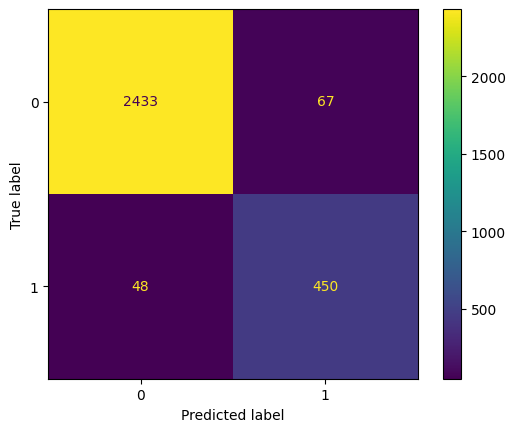

In [81]:
# Создадим массив значений для матрицы ошибок
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Построим матрицу ошибок
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

Модель делает больше ложноположительных предсказаний, чем ложноотрицательных, что означает, что некоторые сотрудники могут быть неправильно идентифицированы. Но даже при этом она продемонстрировала свою надежность.

Рассмотрим анализ разделения модели дерева решений и выявление наиболее важных признаков в модели случайного леса.

#### Анализ разделения дерева решений

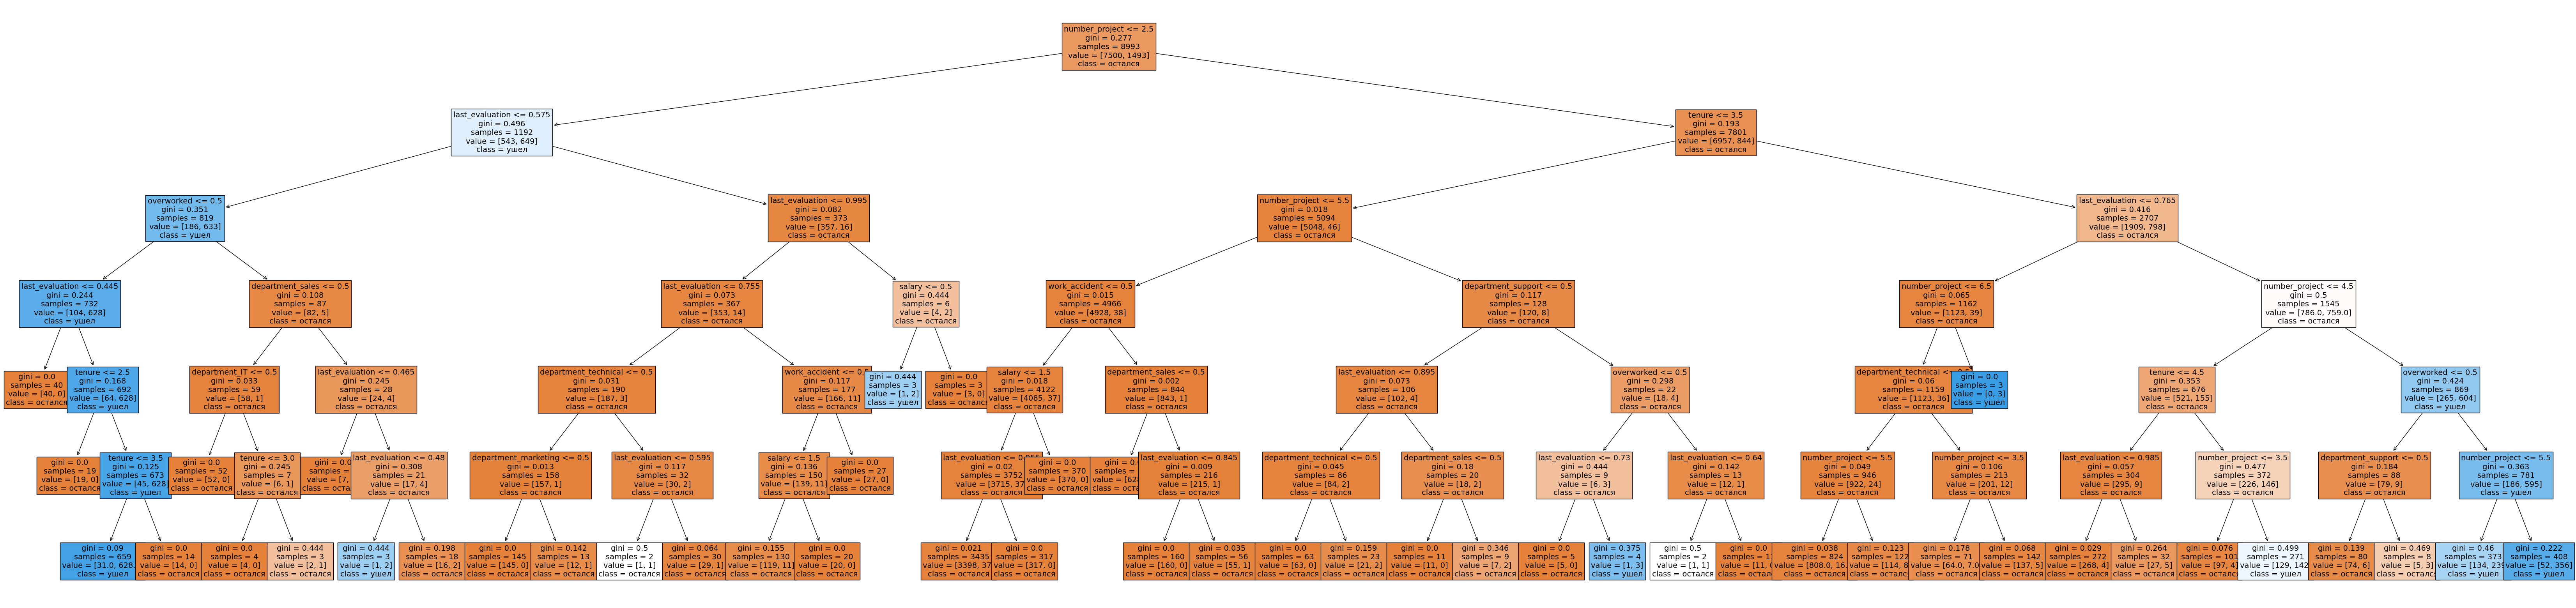

In [82]:
# Построение дерева
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'остался', 1:'ушел'}, filled=True);
plt.show()

#### Важность признаков дерева решений

Получим важность признаков из деревьев решений

In [83]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Извлечение только признаков с важностью > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
last_evaluation              0.343958
number_project               0.343385
tenure                       0.215681
overworked                   0.093498
department_support           0.001142
salary                       0.000910
department_sales             0.000607
department_technical         0.000418
work_accident                0.000183
department_IT                0.000139
department_marketing         0.000078

Создадим столбчатую диаграмму, чтобы визуализировать важность признаков дерева решений.

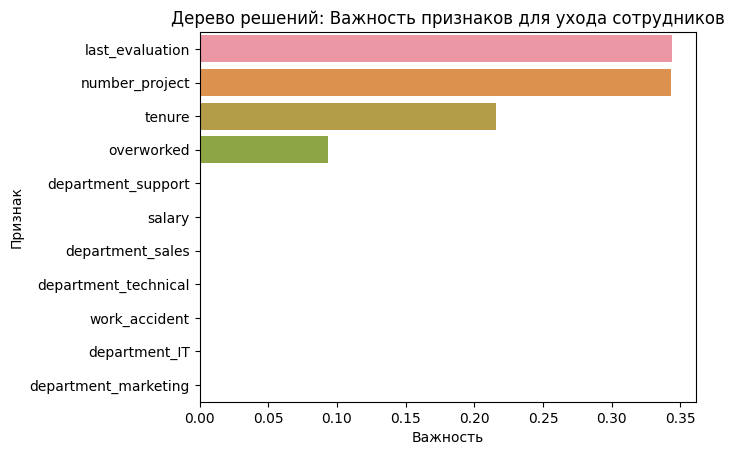

In [84]:
sns.barplot(data=tree2_importances, x='gini_importance', y=tree2_importances.index, orient='h')
plt.title('Дерево решений: Важность признаков для ухода сотрудников', fontsize=12)
plt.ylabel('Признак')
plt.xlabel('Важность')
plt.show()

Столбчатая диаграмма выше показывает, что в этой модели дерева решений наивысшую важность имеют `last_evaluation`, `number_project`, `tenure` и `overworked`. Эти переменные наиболее полезны при прогнозировании исходной переменной `left`.

#### Важность признаков случайного леса

Теперь построим график важности признаков для модели случайного леса.

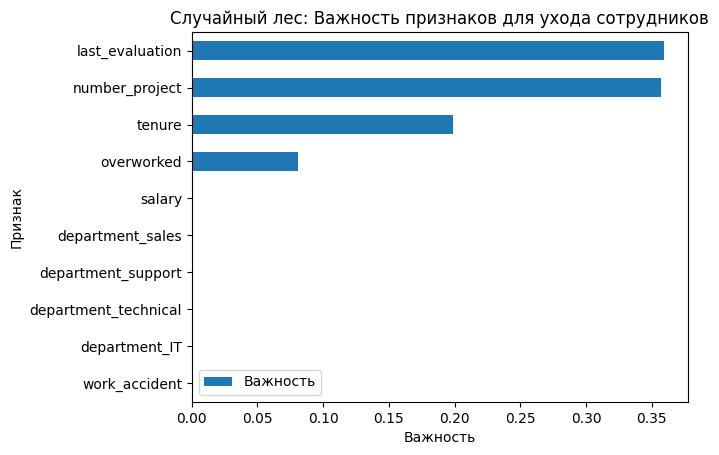

In [85]:
# Получение важности признаков
feat_impt = rf2.best_estimator_.feature_importances_

# Получение индексов топ-10 признаков
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Получение меток столбцов топ-10 признаков 
feat = X.columns[ind]

# Фильтрация `feat_impt`, важности топ-10 признаков
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({'Признак':feat,'Важность':feat_impt})
y_sort_df = y_df.sort_values('Важность')
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x='Признак',y='Важность')

ax1.set_title('Случайный лес: Важность признаков для ухода сотрудников', fontsize=12)
ax1.set_ylabel('Признак')
ax1.set_xlabel('Важность')

plt.show()

График выше показывает, что в этой модели случайного леса наибольшее значение имеют переменные `last_evaluation`, `number_project`, `tenure` и `overworked`, в указанном порядке. Эти переменные наиболее полезны для предсказания зависимой переменной `left`, и они совпадают с теми, которые использовались в модели дерева решений.

## pacE: Стадия выполнения

### Обзор результатов моделей

**Логистическая регрессия**

Модель логистической регрессии достигла следующих результатов на тестовом наборе данных: точность 80%, полнота 83%, F1-мера 80% (все взвешенные средние) и точность 83%.

**Машинное обучение на основе деревьев**

После проведения инженерии признаков модель дерева решений показала следующие показатели на тестовом наборе данных: AUC 93,8%, точность 87,0%, полнота 90,4%, F1-мера 88,7% и точность 96,2%. Модель случайного леса немного превзошла модель дерева решений.

### Заключение, рекомендации и следующие шаги

Модели и важность признаков, выявленных моделями, подтверждают, что сотрудники компании перегружены работой.

Для того чтобы удержать сотрудников, руководству рекомендуется рассмотреть следующие меры:

- Ограничить количество проектов, над которыми могут работать сотрудники.
- Рассмотреть возможность продвижения сотрудников, отработавших в компании не менее четырех лет, или провести дополнительное исследование, чтобы понять причины недовольства сотрудников с таким стажем.
- Внедрить систему вознаграждения за сверхурочную работу или уменьшить нагрузку на сотрудников.
- Провести информирование сотрудников о политике компании в отношении сверхурочных работ. Обеспечить ясность в ожиданиях по рабочей нагрузке и времени отдыха.
- Проводить общие и командные обсуждения для улучшения корпоративной культуры.
- Рассмотреть возможность пропорционального вознаграждения сотрудников, вносящих больший вклад или прикладывающих больше усилий.

**Следующие шаги**

Остается вопрос о возможной утечке данных. Может быть целесообразно исследовать, как изменится прогностическая способность модели, если исключить `last_evaluation` из данных. Также стоит рассмотреть возможность предсказания удержания сотрудников без использования этой переменной, если оценки проводятся нечасто и имеют важное значение. Для другого проекта можно рассмотреть построение других моделей машинного обучения.